### The reasons for the outstanding performance of the YSO class

In [4]:
#------------------------------------------------------------------------------------
#IMPORT THE REQUIRED LIBRARIES
#------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import timeit
import warnings
warnings.filterwarnings("ignore")

#Data loading
df= pd.read_csv("Spectrums_columns.csv")
df = df.drop(columns=['Unnamed: 0'])

#We standardize, average 0 standard deviation 1
scaler=StandardScaler()
fited=scaler.fit(df.iloc[:,6:66])
df.iloc[:,6:66]=scaler.transform(df.iloc[:,6:66])
scaler=StandardScaler()
fited=scaler.fit(df.iloc[:,66:])
df.iloc[:,66:]=scaler.transform(df.iloc[:,66:])

#Non-standardized data
df_nostand= pd.read_csv("Spectrums_columns.csv")
df_nostand = df_nostand.drop(columns=['Unnamed: 0'])

In [5]:
#This function gives us back the trend of the spectra of the same class.
def trend_spectra(data):
    mean_mean = []
    list_mean = []
    fet = list(np.unique(data["feature"]))
    for j in fet:
        l = []
        for i in range(120):
            l.append(np.mean(data[data["feature"]== j].iloc[:,6+i]))   
        mean_mean.append(np.mean(l))
        list_mean.append(l)
    return mean_mean, list_mean

In [6]:
#Standardized and non-standardized tren spectra
spectra_stand = trend_spectra(df)[1]
spectra_nostand = trend_spectra(df_nostand)[1]

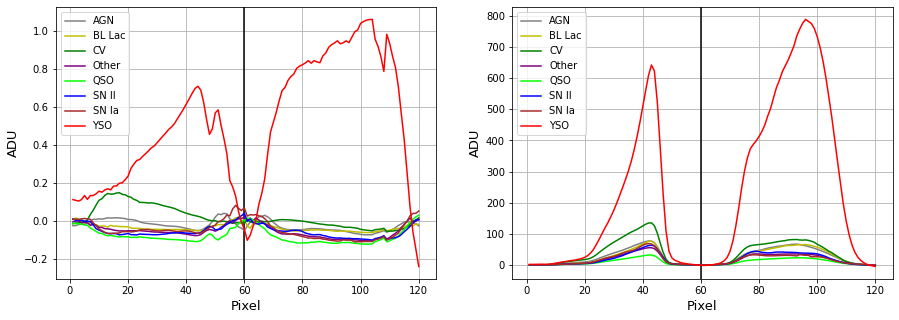

In [13]:
#Representation of results
y = np.arange(1, 121, 1)
plt.figure(figsize=(15, 5))

#Standardized plot
plt.subplot(1, 2, 1)
plt.ylabel('ADU', size = 13)
plt.xlabel('Pixel', size = 13)
plt.grid()
plt.axvline(x=60, c='black')
plt.plot(y, spectra_stand[0], c= 'grey', label = 'AGN')
plt.plot(y, spectra_stand[1], c = 'y', label = 'BL Lac' )
plt.plot(y, spectra_stand[2], c = 'g', label = 'CV')
plt.plot(y, spectra_stand[3], c = 'purple', label = 'Other')
plt.plot(y, spectra_stand[4], c = 'lime', label = 'QSO')
plt.plot(y, spectra_stand[5], c = 'blue', label = 'SN II')
plt.plot(y, spectra_stand[6], c = 'brown', label = 'SN Ia')
plt.plot(y, spectra_stand[7], c= 'r', label = 'YSO')
plt.legend()


#Non-standardized plot
plt.subplot(1, 2, 2)
plt.ylabel('ADU', size = 13)
plt.xlabel('Pixel', size = 13)
plt.grid()
plt.axvline(x=60, c='black')
plt.plot(y, spectra_nostand[0], c= 'grey', label = 'AGN')
plt.plot(y, spectra_nostand[1], c = 'y', label = 'BL Lac' )
plt.plot(y, spectra_nostand[2], c = 'g', label = 'CV')
plt.plot(y, spectra_nostand[3], c = 'purple', label = 'Other')
plt.plot(y, spectra_nostand[4], c = 'lime', label = 'QSO')
plt.plot(y, spectra_nostand[5], c = 'blue', label = 'SN II')
plt.plot(y, spectra_nostand[6], c = 'brown', label = 'SN Ia')
plt.plot(y, spectra_nostand[7], c= 'r', label = 'YSO')
plt.legend()